# Titanic Survival Prediction

In this notebook,I've been tasked with using the famous Titanic Passenger's dataset on Kaggle, to make a model for predicting whether the passenger survived or not.

### Contents:

Following are the contents of the notebook:
* 1. Introduction
* 2. Overview of Dataset
* 3. Data Preprocessing
* 4. Data Visualization
* 5. Applying ML Model
* 6. Validation of Model


# Introduction

We begin by importing the relvant libraries for data analysis and loading the dataset.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
#loading dataset
df=pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Let's start by describing the dataset and different variables present the dataset.

The data has been collected of the information of the passengers that were aboard the vessel 'The Titanic' that tragically sunk in April,1912, killing many of its passengers. Following is a brief description of the different variables present in the dataset.

* **Passenger ID:** An ID number given to each passenger aboard the ship.
* **Survived:** A binary classification indicating whether the passenger survived or not.
* **Pclass:** Indicated the class of the passenger.
* **Name:** Name of the passenger.
* **Sex:** Indicates the gender of the passengers.
* **Age:** Indicates the age of the passengers.
* **SibSp:** Indicates the number of siblings/spouse of the passenger.
* **Parch:** Indicated the number of parents/children of the passenger.
* **Ticket:** Indicates the ticket number.
* **Cabin:** Indicates the cabin.
* **Embarked:** Indicates the station from which the passenger embarked on.C = Cherbourg; Q = Queenstown; S = Southampton.


# Overview of the dataset

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# let's get a summary of the statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.shape

(418, 12)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data Preprocessing
In this step, we will filter and preprocess our data to get better and more accurate results in our model.

# Handling Missing Values

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are null values in age,fare and cabin variables.We remove these by median imputation.

In [9]:
#Filling missing age values
median_age=df['Age'].median()
df['Age']=df['Age'].fillna(median_age)

In [10]:
#Filling missing fare values
median_fare=df['Fare'].median()
df['Fare']=df['Fare'].fillna(median_fare)

# Dropping irrelevant columns

From our analysis,some variables will have no relevant affect on the survival rate.So we are dropping these variables.

In [11]:
df.drop(['PassengerId','Name','Cabin','Ticket'], axis =1, inplace=True)

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


# Handling Categorical Variables

We convert the 'Sex' and 'Embarked' variables into numerical variables

In [13]:
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
df['Sex'] = df['Sex'].map( {'female': 1,'male':0}).astype(int)

In [14]:
# Converting the float variables into int variables
df['Age']=df['Age'].astype(int)
df['Fare']=df['Fare'].astype(int)

In [15]:
df.dtypes

Survived    int64
Pclass      int64
Sex         int32
Age         int32
SibSp       int64
Parch       int64
Fare        int32
Embarked    int32
dtype: object

In [16]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1


# Data Visualization

We start with some data visualizations to get a better understanding of the trends present in our data.

## Survival Rate

In [18]:
df['Sex'].value_counts()

0    266
1    152
Name: Sex, dtype: int64

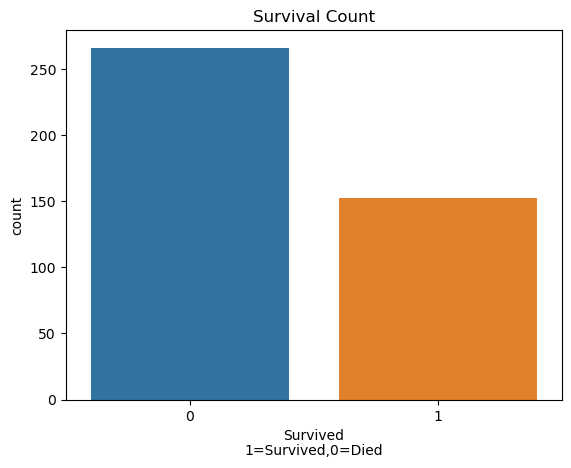

In [19]:
# countplot
sns.countplot(data=df,x='Survived')
plt.title('Survival Count')
plt.text(0.5, -0.15, "1=Survived,0=Died", transform=plt.gca().transAxes, ha='center')

plt.show()

Let's look at the survival percentage based on different factors such as class and gender.

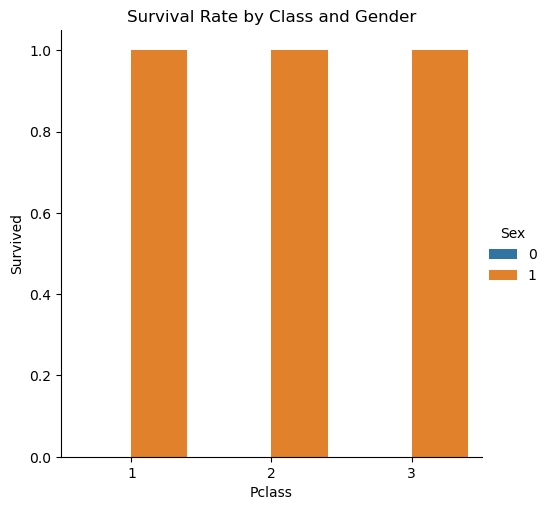

In [20]:
# Survival percentage by class and gender
sns.catplot(data=df, x='Pclass', y='Survived', hue='Sex', kind='bar')
plt.title("Survival Rate by Class and Gender")
plt.show()

In [21]:
# Calculate the percentage of survivors by gender
survived_gender_percentage = df.groupby('Sex')['Survived'].mean() * 100

print(survived_gender_percentage)

Sex
0      0.0
1    100.0
Name: Survived, dtype: float64


## Age Distribution

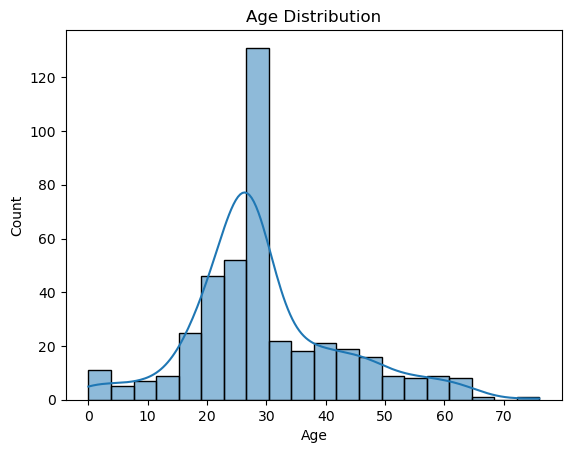

In [22]:
#Plot to check age distribution
sns.histplot(data=df,x='Age',bins=20,kde=True)
plt.title('Age Distribution')
plt.show()

In [23]:
def get_survived_age_sex(dataframe):
    # Filter passengers who survived
    survived_df = dataframe[dataframe['Survived'] == 1]

    # Select and return age and sex columns
    survived_age_sex = survived_df[['Age', 'Sex']]

    return survived_age_sex

# Call the function and store the result
survived_age_sex_df = get_survived_age_sex(df)

print(survived_age_sex_df.head())


    Age  Sex
1    47    1
4    22    1
6    30    1
8    18    1
12   23    1


## Fare distribution

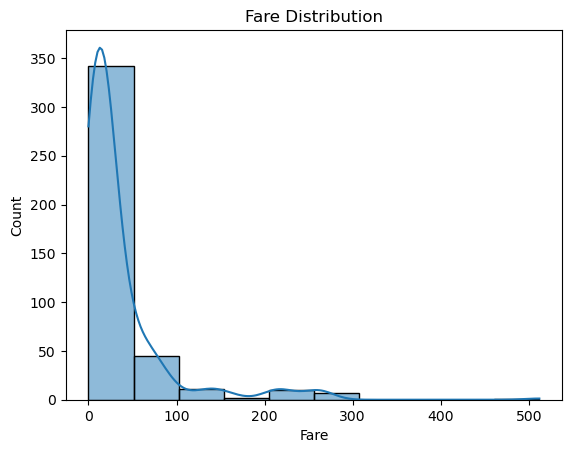

In [24]:
# histogram of fair distributuion

sns.histplot(data=df,x='Fare',bins=10,kde=True)
plt.title('Fare Distribution')
plt.show()

## Class Distribution

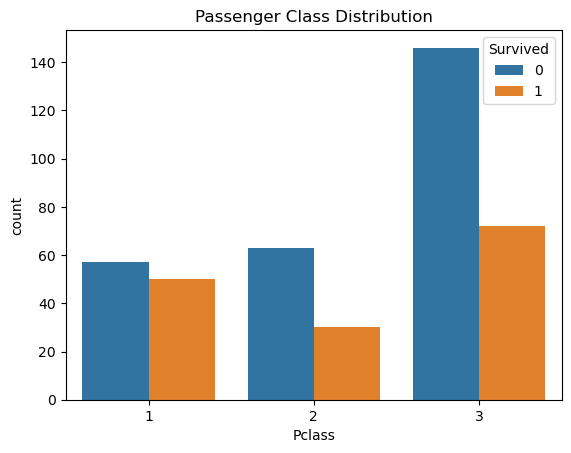

In [25]:
#plot to show class distribution
sns.countplot(data=df,x='Pclass',hue='Survived')
plt.title('Passenger Class Distribution')
plt.show()

## Embarked Port and Survival

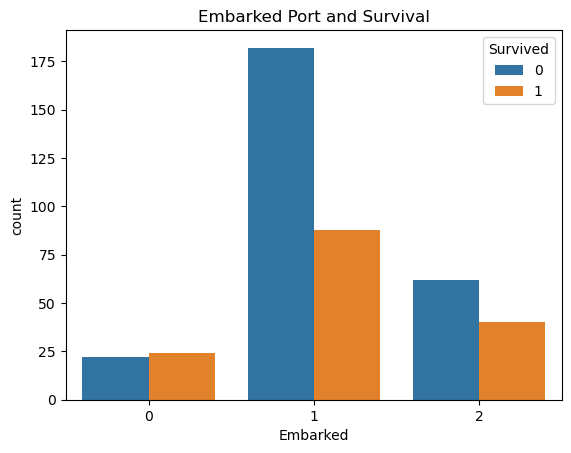

In [26]:
sns.countplot(data=df,x='Embarked',hue='Survived')
plt.title('Embarked Port and Survival')
plt.show()

## Age and Fare by Survival

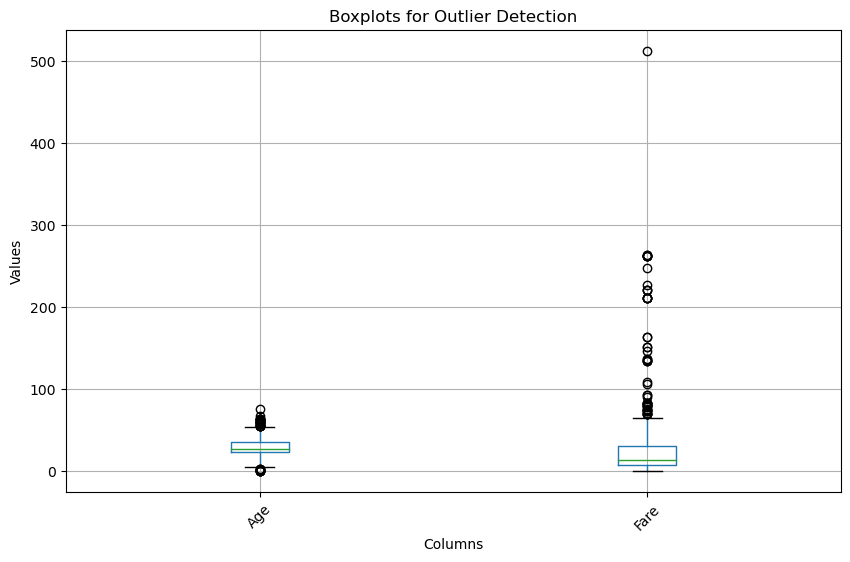

In [27]:

# Define the columns to check for outliers
columns_to_check = ['Age', 'Fare']

# Create boxplots for the specified columns
plt.figure(figsize=(10, 6))
df[columns_to_check].boxplot()
plt.title('Boxplots for Outlier Detection')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()


## Removing outliers

Let's remove the outliers apparent in the above graph

In [28]:
columns_to_check=['Age','Fare']
# We will make a function for removing outliers using the IQR method
def remove_outliers(data,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered
# Remove outliers from selected columns
for column in columns_to_check:
    titanic_data = remove_outliers(df, column)

    

Again we plot the boxplots

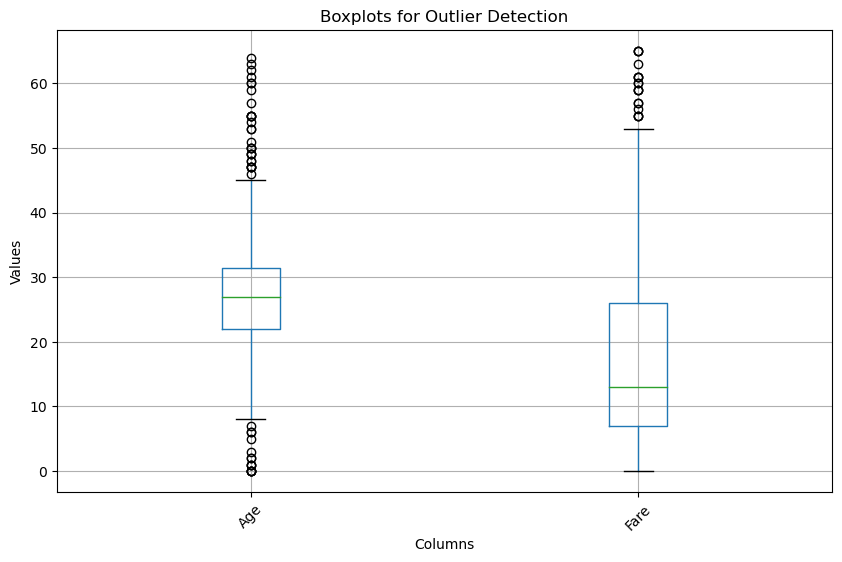

In [29]:

# Define the columns to check for outliers
columns_to_check = ['Age', 'Fare']

# Create boxplots for the specified columns
plt.figure(figsize=(10, 6))
titanic_data[columns_to_check].boxplot()
plt.title('Boxplots for Outlier Detection')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

In [30]:
df.shape

(418, 8)

## Correlation Heatmap

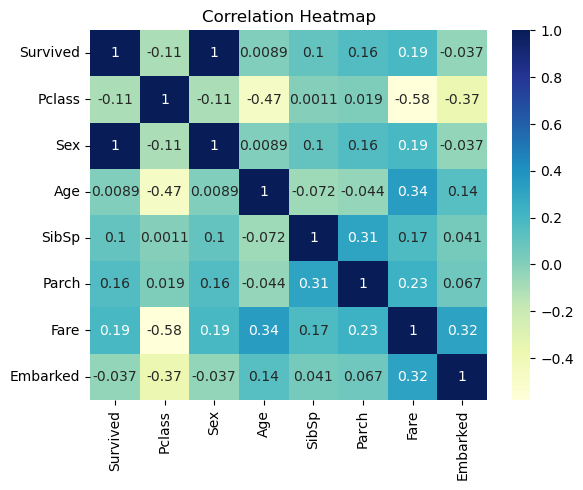

In [31]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

# Applying ML Model

Now we have to apply models to the refined dataset,in order to predict the survival rate. We will apply the Support Vector Machine Model using different kernels.

## Splitting the data

In [32]:
from sklearn.model_selection import train_test_split
x=df.drop(['Survived'],axis=1)
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


# Support Vector Machines

We will run the model using two kernels-polynomial and rbf. Then we will compare the accuracy of both.

## Using polynomial kernel

In [33]:
from sklearn.svm import SVC
# instantiate classifier with polynomial kernel and C=1000.0
poly_svc=SVC(kernel='poly', C=1000.0) 


# fit classifier to training set
poly_svc.fit(x_train,y_train)


# make predictions on test set
y_pred_poly=poly_svc.predict(x_test)
# compute and print accuracy score
from sklearn.metrics import accuracy_score
svc_poly_score=accuracy_score(y_test,y_pred_poly)

print('Model accuracy score with polynomial kernel and C=1000.0 :',svc_poly_score)

Model accuracy score with polynomial kernel and C=1000.0 : 0.8928571428571429


## Using rbf kernel

In [34]:
# instantiate classifier with rbf kernel and C=100.0
poly_svc=SVC(kernel='rbf', C=100.0) 


# fit classifier to training set
poly_svc.fit(x_train,y_train)


# make predictions on test set
y_pred_rbf=poly_svc.predict(x_test)

svc_rbf_score=accuracy_score(y_test, y_pred_rbf)
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100:',svc_rbf_score)

Model accuracy score with rbf kernel and C=100: 0.9761904761904762


**Note:** If C=1000 for the rbf kernel,accuracy becomes 1.

# Comparision of results

Now,we compare the accuracy scores of the different kernels for the model we have applied:

In [35]:
print('Model accuracy score with polynomial kernel and C=1000.0 :',svc_poly_score)
print('Model accuracy score with rbf kernel and C=100:',svc_rbf_score)

Model accuracy score with polynomial kernel and C=1000.0 : 0.8928571428571429
Model accuracy score with rbf kernel and C=100: 0.9761904761904762


# Validation of Results

We can validate our results using different techniques.Here,I'll be using two techniques:
* Confusion Matrix
* Classification Report

## Confusion Matrix

A confusion matrix is a good tool for evaluating the performance of our classification model.It gives us the number of true and false positives and negatives.


True Positives(TP) =  58

True Negatives(TN) =  17

False Positives(FP) =  0

False Negatives(FN) =  9


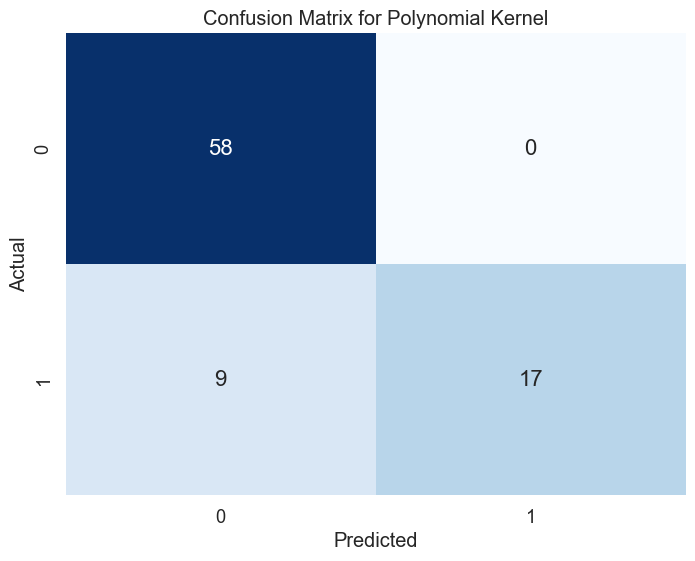


True Positives(TP) =  56

True Negatives(TN) =  26

False Positives(FP) =  2

False Negatives(FN) =  0


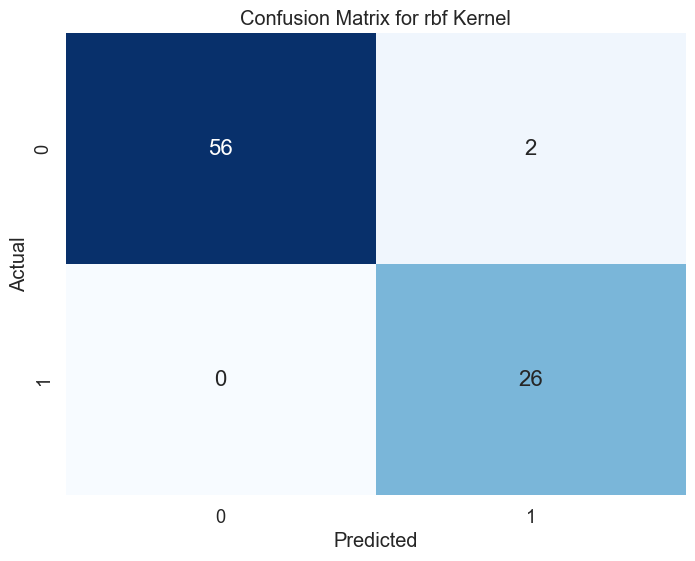

In [36]:
#For Polynomial kernel
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_poly)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16}, cbar=False)

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
# Add labels for true positives, true negatives, false positives, and false negatives
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])
plt.title("Confusion Matrix for Polynomial Kernel")

# Display the plot
plt.show()

#For rbf kernel

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rbf)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16}, cbar=False)

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
# Add labels for true positives, true negatives, false positives, and false negatives
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])
plt.title("Confusion Matrix for rbf Kernel")

# Display the plot
plt.show()

## Classification Report



A classification report is a summary of various classification metrics that are used to evaluate the performance of a classification model.It includes the following parameters:

* 1.Precision: The ratio of true positive predictions to total positive predictions, measuring the accuracy of positive predictions.

* 2.Recall (Sensitivity): The ratio of true positive predictions to total actual positives, indicating the model's ability to capture positive instances.

* 3.F1-Score: The harmonic mean of precision and recall, providing a balanced measure of overall model performance.

* 4.Support: The number of true instances for each class in the dataset, helping to understand class distribution.

* 5.Accuracy: The ratio of correct predictions to total predictions, representing the overall correctness of predictions.

In [37]:
from sklearn.metrics import classification_report

# Calculate the F1-Score for polynomial kernel
class_poly = classification_report(y_test, y_pred_poly)

# Print the F1-Score
print( class_poly)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        58
           1       1.00      0.65      0.79        26

    accuracy                           0.89        84
   macro avg       0.93      0.83      0.86        84
weighted avg       0.91      0.89      0.89        84



In [38]:
# Calculate the F1-Score for rbf kernel
class_rbf = classification_report(y_test, y_pred_rbf)

# Print the F1-Score
print( class_rbf)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        58
           1       0.93      1.00      0.96        26

    accuracy                           0.98        84
   macro avg       0.96      0.98      0.97        84
weighted avg       0.98      0.98      0.98        84



# Conclusion

The best performing model is the rbf kernel SVM.